# Phase 3: Modelling and Communication



### Phase Introduction

This notebook documents the **Modelling and Communication** phase of the data science project. In this phase, the focus is on applying appropriate models to the dataset and evaluating their performance. The key objectives of this phase are:

- **Modelling Task**: Selecting the appropriate model based on the nature of the data and the specific questions you aim to answer. This may involve tasks such as classification, regression, or hypothesis testing. For clustering tasks, the phase includes exploring different values for the number of clusters (k) and employing multiple clustering algorithms.
  
- **Baseline Model Creation**: Developing a simple model as a baseline for comparison. This helps establish a minimum performance threshold for evaluating more advanced models.
  
- **Model Evaluation**: Building and evaluating at least two additional models, choosing the best-performing one for prediction. Different algorithms and configurations will be explored to ensure optimal performance.

- **Clustering and Classification**: For clustering tasks, experimenting with various clustering algorithms like K-Means, DBSCAN, and hierarchical clustering, and for classification or regression tasks, building models to predict outcomes.

Each step is carefully documented, including the rationale behind model selection, the evaluation metrics used, and any challenges encountered. This process will ultimately guide further analysis, model selection, and optimization. The insights and models developed will be crucial for answering the project’s key questions and advancing the data science workflow.


first question


Model Performance on Total Affected:
Linear Regression R2: 0.1668
Random Forest R2: 0.2683
Gradient Boosting R2: 0.2444

Model Performance on Total Damages:
Linear Regression R2: 0.0278
Random Forest R2: -0.0430
Gradient Boosting R2: -0.0548


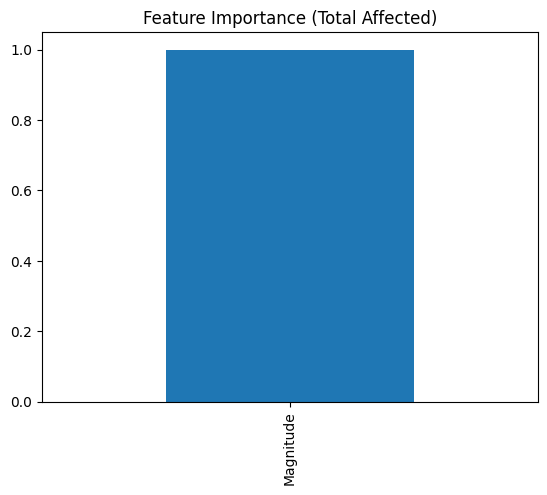

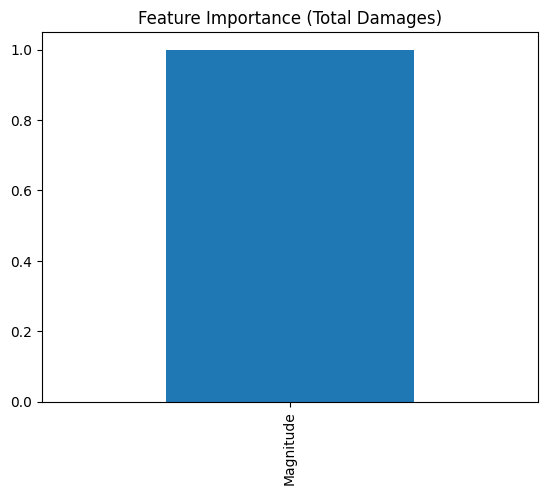

In [ ]:
# RQ1 Full Code: Predict Total Affected and Total Damages from Earthquake Magnitude

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# 1. Load the data
df = pd.read_csv('Natural_Disaster_Impact.csv')

# 2. Data Cleaning
# Convert Latitude and Longitude to float
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filter for Earthquakes only and Magnitude Scale = Richter
earthquake_df = df[(df['Disaster Type'] == 'Earthquake') & (df['Magnitude Scale'] == 'Richter')]

# Drop rows with missing important values
earthquake_df = earthquake_df.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Total Affected', "Total Damages ('000 US$)"])

# 3. Feature and Target Selection
features = earthquake_df[['Magnitude']]  # Only Magnitude used for now

# Targets
target_affected = earthquake_df['Total Affected']
target_damages = earthquake_df["Total Damages ('000 US$)"]

# 4. Split Data
X_train_aff, X_test_aff, y_train_aff, y_test_aff = train_test_split(features, target_affected, test_size=0.2, random_state=42)
X_train_dam, X_test_dam, y_train_dam, y_test_dam = train_test_split(features, target_damages, test_size=0.2, random_state=42)

# 5. Models
# Baseline Model: Linear Regression
lin_reg_aff = LinearRegression().fit(X_train_aff, y_train_aff)
lin_reg_dam = LinearRegression().fit(X_train_dam, y_train_dam)

# Random Forest
rf_aff = RandomForestRegressor(random_state=42).fit(X_train_aff, y_train_aff)
rf_dam = RandomForestRegressor(random_state=42).fit(X_train_dam, y_train_dam)

# Gradient Boosting
gb_aff = GradientBoostingRegressor(random_state=42).fit(X_train_aff, y_train_aff)
gb_dam = GradientBoostingRegressor(random_state=42).fit(X_train_dam, y_train_dam)

# 6. Evaluate Models
# Linear Regression R2
r2_lin_aff = r2_score(y_test_aff, lin_reg_aff.predict(X_test_aff))
r2_lin_dam = r2_score(y_test_dam, lin_reg_dam.predict(X_test_dam))

# Random Forest R2
r2_rf_aff = r2_score(y_test_aff, rf_aff.predict(X_test_aff))
r2_rf_dam = r2_score(y_test_dam, rf_dam.predict(X_test_dam))

# Gradient Boosting R2
r2_gb_aff = r2_score(y_test_aff, gb_aff.predict(X_test_aff))
r2_gb_dam = r2_score(y_test_dam, gb_dam.predict(X_test_dam))

# 7. Print Results
print("Model Performance on Total Affected:")
print(f"Linear Regression R2: {r2_lin_aff:.4f}")
print(f"Random Forest R2: {r2_rf_aff:.4f}")
print(f"Gradient Boosting R2: {r2_gb_aff:.4f}")

print("\nModel Performance on Total Damages:")
print(f"Linear Regression R2: {r2_lin_dam:.4f}")
print(f"Random Forest R2: {r2_rf_dam:.4f}")
print(f"Gradient Boosting R2: {r2_gb_dam:.4f}")

# Optional: Plot feature importance for Random Forest
feature_importances = pd.Series(rf_aff.feature_importances_, index=features.columns)
feature_importances.plot(kind='bar', title='Feature Importance (Total Affected)')
plt.show()

feature_importances_dam = pd.Series(rf_dam.feature_importances_, index=features.columns)
feature_importances_dam.plot(kind='bar', title='Feature Importance (Total Damages)')
plt.show()

Model Performance on Total Affected (Magnitude + Development Level):
Linear Regression R2: 0.0515
Random Forest R2: 0.1204
Gradient Boosting R2: 0.1026


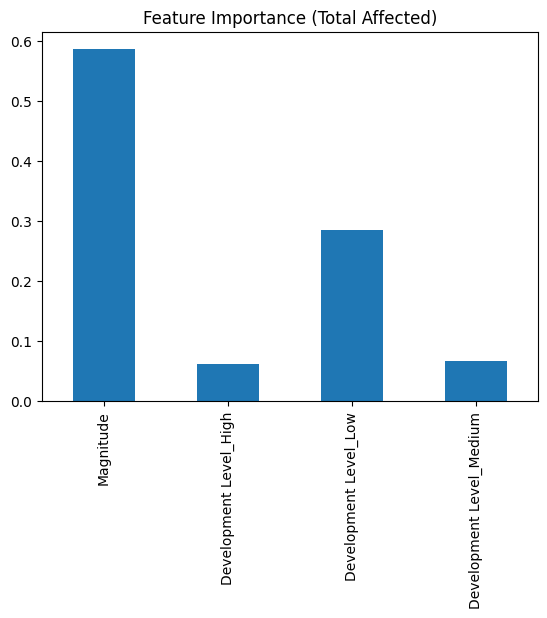

In [ ]:
# RQ1 Full Code (Upgraded): Predict Total Affected from Earthquake Magnitude + Development Level

# 1. Load the data
df = pd.read_csv('Natural_Disaster_Impact.csv')

# 2. Data Cleaning
# Convert Latitude and Longitude to float
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filter for Earthquakes only and Magnitude Scale = Richter
earthquake_df = df[(df['Disaster Type'] == 'Earthquake') & (df['Magnitude Scale'] == 'Richter')]

# Drop rows with missing important values
earthquake_df = earthquake_df.dropna(subset=['Magnitude', 'Total Affected', 'ISO'])

# 3. Feature Engineering
# Define Development Level manually
high_dev = ['USA', 'JPN', 'GRC', 'ITA', 'CHL', 'NZL', 'ESP', 'TUR']
medium_dev = ['MEX', 'IDN', 'IRN', 'PHL', 'CHN']
low_dev = ['HTI', 'NPL', 'PAK', 'ETH', 'SDN']

def map_development_level(iso):
    if iso in high_dev:
        return 'High'
    elif iso in medium_dev:
        return 'Medium'
    elif iso in low_dev:
        return 'Low'
    else:
        return 'Medium'  # Default if not classified

# Apply mapping
earthquake_df['Development Level'] = earthquake_df['ISO'].map(map_development_level)

# One-Hot Encode Development Level
features = pd.get_dummies(earthquake_df[['Magnitude', 'Development Level']], columns=['Development Level'])

# Target
target_affected = earthquake_df['Total Affected']

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target_affected, test_size=0.2, random_state=42)

# 5. Models
# Baseline Model: Linear Regression
lin_reg = LinearRegression().fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

# 6. Evaluate Models
# Linear Regression R2
r2_lin = r2_score(y_test, lin_reg.predict(X_test))

# Random Forest R2
r2_rf = r2_score(y_test, rf.predict(X_test))

# Gradient Boosting R2
r2_gb = r2_score(y_test, gb.predict(X_test))

# 7. Print Results
print("Model Performance on Total Affected (Magnitude + Development Level):")
print(f"Linear Regression R2: {r2_lin:.4f}")
print(f"Random Forest R2: {r2_rf:.4f}")
print(f"Gradient Boosting R2: {r2_gb:.4f}")

# Optional: Plot feature importance for Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
feature_importances.plot(kind='bar', title='Feature Importance (Total Affected)')
plt.show()

Model Performance on Total Affected (Magnitude + Region):
Linear Regression R2: 0.1112
Random Forest R2: 0.4856
Gradient Boosting R2: 0.4794


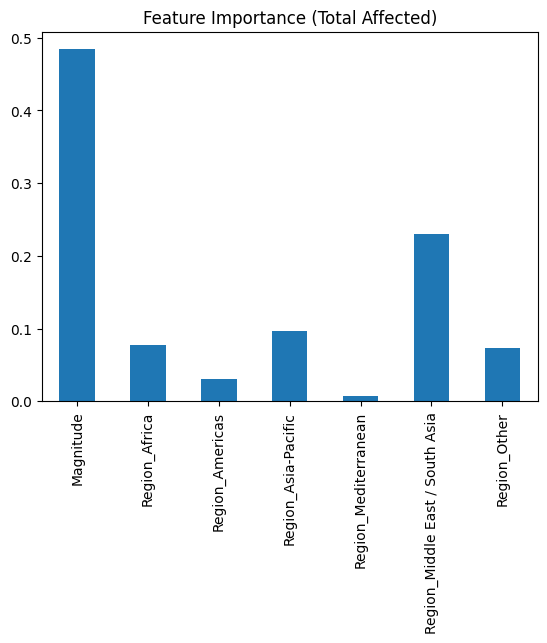

In [ ]:
# RQ1 Full Code (Upgraded): Predict Total Affected from Earthquake Magnitude + Region (based on Latitude/Longitude)


# 1. Load the data
df = pd.read_csv('Natural_Disaster_Impact.csv')

# 2. Data Cleaning
# Convert Latitude and Longitude to float
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filter for Earthquakes only and Magnitude Scale = Richter
earthquake_df = df[(df['Disaster Type'] == 'Earthquake') & (df['Magnitude Scale'] == 'Richter')]

# Drop rows with missing important values
earthquake_df = earthquake_df.dropna(subset=['Magnitude', 'Total Affected', 'Latitude', 'Longitude'])

# 3. Feature Engineering
# Define Regions based on Latitude and Longitude

def assign_region(lat, lon):
    if (-50 <= lat <= 60) and (100 <= lon or lon <= -80):
        return 'Asia-Pacific'
    elif (30 <= lat <= 45) and (-10 <= lon <= 40):
        return 'Mediterranean'
    elif (-60 <= lat <= 60) and (-130 <= lon <= -30):
        return 'Americas'
    elif (-35 <= lat <= 35) and (-20 <= lon <= 50):
        return 'Africa'
    elif (10 <= lat <= 40) and (40 <= lon <= 100):
        return 'Middle East / South Asia'
    else:
        return 'Other'

# Apply mapping
earthquake_df['Region'] = earthquake_df.apply(lambda row: assign_region(row['Latitude'], row['Longitude']), axis=1)

# One-Hot Encode Region
features = pd.get_dummies(earthquake_df[['Magnitude', 'Region']], columns=['Region'])

# Target
target_affected = earthquake_df['Total Affected']

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target_affected, test_size=0.2, random_state=42)

# 5. Models
# Baseline Model: Linear Regression
lin_reg = LinearRegression().fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

# 6. Evaluate Models
# Linear Regression R2
r2_lin = r2_score(y_test, lin_reg.predict(X_test))

# Random Forest R2
r2_rf = r2_score(y_test, rf.predict(X_test))

# Gradient Boosting R2
r2_gb = r2_score(y_test, gb.predict(X_test))

# 7. Print Results
print("Model Performance on Total Affected (Magnitude + Region):")
print(f"Linear Regression R2: {r2_lin:.4f}")
print(f"Random Forest R2: {r2_rf:.4f}")
print(f"Gradient Boosting R2: {r2_gb:.4f}")

# Optional: Plot feature importance for Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
feature_importances.plot(kind='bar', title='Feature Importance (Total Affected)')
plt.show()

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                          Latitude  Longitude  Start Year  Start Month  \
Latitude                  1.000000   0.169638   -0.030982    -0.018629   
Longitude                 0.169638   1.000000    0.246515     0.015126   
Start Year               -0.030982   0.246515    1.000000    -0.053540   
Start Month              -0.018629   0.015126   -0.053540     1.000000   
End Year                 -0.030982   0.246515    1.000000    -0.053540   
End Month                -0.026489   0.017103   -0.039881     0.995720   
Magnitude                -0.039055  -0.011350    0.074751     0.010767   
Total Deaths              0.064387  -0.025063   -0.032566     0.119678   
No. Injured              -0.003198  -0.011175   -0.019725    -0.064731   
Total Affected           -0.089443  -0.036307    0.037687    -0.106244   
No. Homeless             -0.021312  -0.001922    0.040054    -0.037190   
Total Damages ('000 US$)  0.004265   0.045167    0.043981    -0.157136   

                          End Year  E

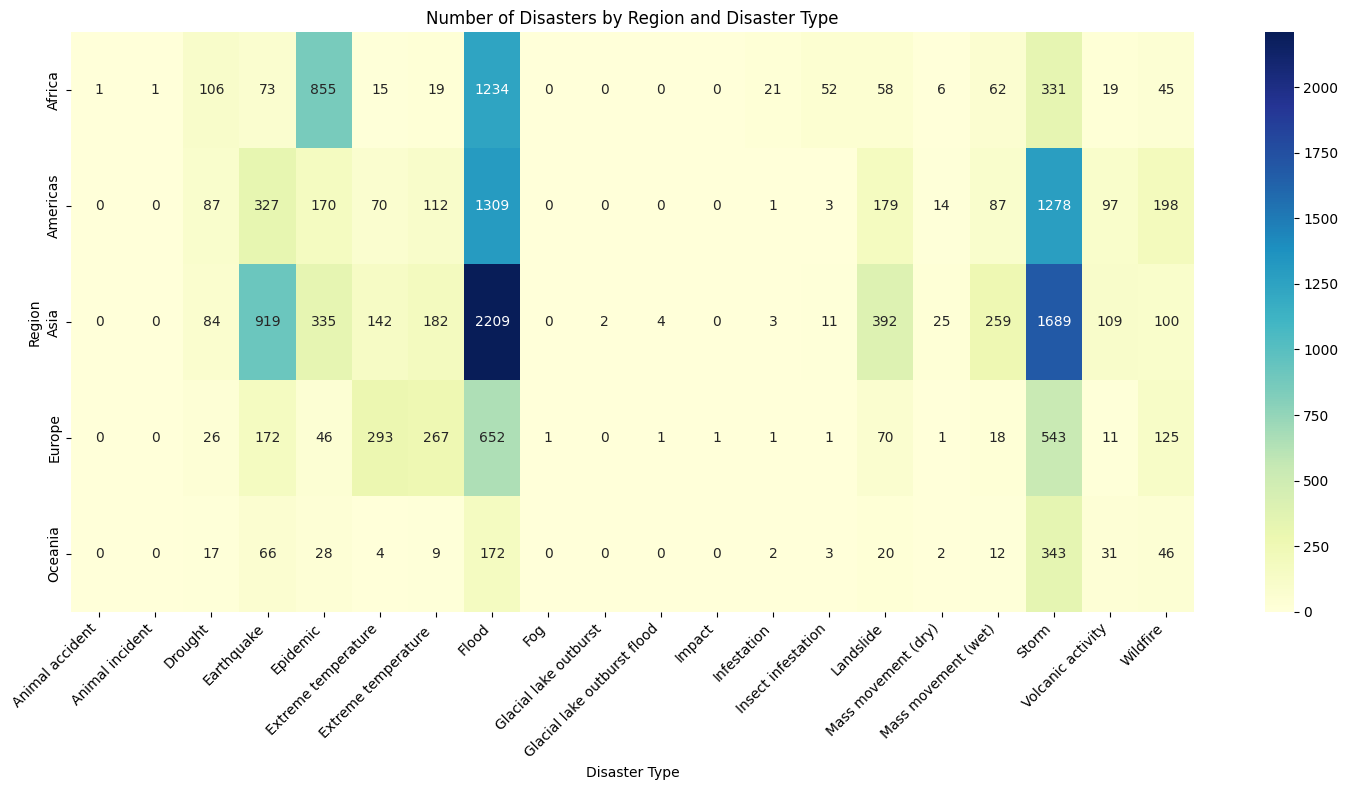

Top regions most affected by each disaster type:
Animal accident: Africa with 1 events
Animal incident: Africa with 1 events
Drought: Africa with 106 events
Earthquake: Asia with 919 events
Epidemic: Africa with 855 events
Extreme temperature: Europe with 293 events
Extreme temperature : Europe with 267 events
Flood: Asia with 2209 events
Fog: Europe with 1 events
Glacial lake outburst: Asia with 2 events
Glacial lake outburst flood: Asia with 4 events
Impact: Europe with 1 events
Infestation: Africa with 21 events
Insect infestation: Africa with 52 events
Landslide: Asia with 392 events
Mass movement (dry): Asia with 25 events
Mass movement (wet): Asia with 259 events
Storm: Asia with 1689 events
Volcanic activity: Asia with 109 events
Wildfire: Americas with 198 events


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
regions_df = pd.read_csv('Regions.csv')

# 2. Define Full ISO to Region Mapping (no exceptions)
# Complete ISO mapping to regions
iso_region_mapping = {
    # Africa
    'DZA': 'Africa', 'AGO': 'Africa', 'BEN': 'Africa', 'BWA': 'Africa', 'BFA': 'Africa',
    'BDI': 'Africa', 'CMR': 'Africa', 'CPV': 'Africa', 'CAF': 'Africa', 'TCD': 'Africa',
    'COM': 'Africa', 'COG': 'Africa', 'CIV': 'Africa', 'DJI': 'Africa', 'EGY': 'Africa',
    'GNQ': 'Africa', 'ERI': 'Africa', 'ETH': 'Africa', 'GAB': 'Africa', 'GMB': 'Africa',
    'GHA': 'Africa', 'GIN': 'Africa', 'GNB': 'Africa', 'KEN': 'Africa', 'LSO': 'Africa',
    'LBR': 'Africa', 'LBY': 'Africa', 'MDG': 'Africa', 'MWI': 'Africa', 'MLI': 'Africa',
    'MRT': 'Africa', 'MUS': 'Africa', 'MAR': 'Africa', 'MOZ': 'Africa', 'NAM': 'Africa',
    'NER': 'Africa', 'NGA': 'Africa', 'RWA': 'Africa', 'STP': 'Africa', 'SEN': 'Africa',
    'SYC': 'Africa', 'SLE': 'Africa', 'SOM': 'Africa', 'ZAF': 'Africa', 'SSD': 'Africa',
    'SDN': 'Africa', 'TZA': 'Africa', 'TGO': 'Africa', 'TUN': 'Africa', 'UGA': 'Africa',
    'ZMB': 'Africa', 'ZWE': 'Africa',

    # Americas
    'ATG': 'Americas', 'ARG': 'Americas', 'BHS': 'Americas', 'BRB': 'Americas', 'BLZ': 'Americas',
    'BOL': 'Americas', 'BRA': 'Americas', 'CAN': 'Americas', 'CHL': 'Americas', 'COL': 'Americas',
    'CRI': 'Americas', 'CUB': 'Americas', 'DMA': 'Americas', 'DOM': 'Americas', 'ECU': 'Americas',
    'SLV': 'Americas', 'GRD': 'Americas', 'GTM': 'Americas', 'GUY': 'Americas', 'HTI': 'Americas',
    'HND': 'Americas', 'JAM': 'Americas', 'MEX': 'Americas', 'NIC': 'Americas', 'PAN': 'Americas',
    'PRY': 'Americas', 'PER': 'Americas', 'KNA': 'Americas', 'LCA': 'Americas', 'VCT': 'Americas',
    'SUR': 'Americas', 'TTO': 'Americas', 'USA': 'Americas', 'URY': 'Americas', 'VEN': 'Americas',

    # Asia
    'AFG': 'Asia', 'ARM': 'Asia', 'AZE': 'Asia', 'BHR': 'Asia', 'BGD': 'Asia',
    'BTN': 'Asia', 'BRN': 'Asia', 'KHM': 'Asia', 'CHN': 'Asia', 'CYP': 'Asia',
    'GEO': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'IRN': 'Asia', 'IRQ': 'Asia',
    'ISR': 'Asia', 'JPN': 'Asia', 'JOR': 'Asia', 'KAZ': 'Asia', 'KWT': 'Asia',
    'KGZ': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MYS': 'Asia', 'MDV': 'Asia',
    'MNG': 'Asia', 'MMR': 'Asia', 'NPL': 'Asia', 'PRK': 'Asia', 'OMN': 'Asia',
    'PAK': 'Asia', 'PSE': 'Asia', 'PHL': 'Asia', 'QAT': 'Asia', 'SAU': 'Asia',
    'SGP': 'Asia', 'KOR': 'Asia', 'LKA': 'Asia', 'SYR': 'Asia', 'TWN': 'Asia',
    'TJK': 'Asia', 'THA': 'Asia', 'TLS': 'Asia', 'TUR': 'Asia', 'TKM': 'Asia',
    'ARE': 'Asia', 'UZB': 'Asia', 'VNM': 'Asia', 'YEM': 'Asia',

    # Europe
    'ALB': 'Europe', 'AND': 'Europe', 'AUT': 'Europe', 'BLR': 'Europe', 'BEL': 'Europe',
    'BIH': 'Europe', 'BGR': 'Europe', 'HRV': 'Europe', 'CZE': 'Europe', 'DNK': 'Europe',
    'EST': 'Europe', 'FIN': 'Europe', 'FRA': 'Europe', 'DEU': 'Europe', 'GRC': 'Europe',
    'HUN': 'Europe', 'ISL': 'Europe', 'IRL': 'Europe', 'ITA': 'Europe', 'LVA': 'Europe',
    'LIE': 'Europe', 'LTU': 'Europe', 'LUX': 'Europe', 'MLT': 'Europe', 'MDA': 'Europe',
    'MCO': 'Europe', 'MNE': 'Europe', 'NLD': 'Europe', 'MKD': 'Europe', 'NOR': 'Europe',
    'POL': 'Europe', 'PRT': 'Europe', 'ROU': 'Europe', 'RUS': 'Europe', 'SMR': 'Europe',
    'SRB': 'Europe', 'SVK': 'Europe', 'SVN': 'Europe', 'ESP': 'Europe', 'SWE': 'Europe',
    'CHE': 'Europe', 'UKR': 'Europe', 'GBR': 'Europe', 'VAT': 'Europe',

    # Oceania
    'AUS': 'Oceania', 'FJI': 'Oceania', 'KIR': 'Oceania', 'MHL': 'Oceania', 'FSM': 'Oceania',
    'NRU': 'Oceania', 'NZL': 'Oceania', 'PLW': 'Oceania', 'PNG': 'Oceania', 'WSM': 'Oceania',
    'SLB': 'Oceania', 'TON': 'Oceania', 'TUV': 'Oceania', 'VUT': 'Oceania',

    # Additional Region Mappings
    'CCK': 'Oceania', 'COD': 'Africa', 'NCL': 'Oceania', 'HKG': 'Asia', 'AIA': 'Americas',
    'DFR': 'Oceania', 'GLP': 'Americas', 'COK': 'Oceania', 'AZO': 'Europe', 'BMU': 'Americas',
    'ANT': 'Americas', 'GUM': 'Oceania', 'ASM': 'Oceania', 'CSK': 'Europe', 'MTQ': 'Americas',
    'SUN': 'Asia', 'TKL': 'Oceania', 'PRI': 'Americas', 'MSR': 'Americas', 'REU': 'Africa',
    'SPI': 'Americas', 'PYF': 'Oceania', 'NIU': 'Oceania', 'YMN': 'Oceania', 'YUG': 'Europe',
    'WLF': 'Oceania', 'YMD': 'Africa', 'DDR': 'Africa', 'SWZ': 'Africa', 'MAC': 'Asia',
    'VIR': 'Americas', 'TCA': 'Americas', 'SCG': 'Europe', 'GUF': 'Americas', 'VGB': 'Americas',
    'CYM': 'Americas', 'SHN': 'Africa', 'MNP': 'Oceania', 'BLM': 'Americas', 'MAF': 'Americas',
    'SXM': 'Americas', 'IMN': 'Europe', 'MYT': 'Oceania'
}

# 3. Strict Mapping (no "Other")
if not regions_df['ISO'].isin(iso_region_mapping.keys()).all():
    missing_isos = regions_df.loc[~regions_df['ISO'].isin(iso_region_mapping.keys()), 'ISO'].unique()
    raise ValueError(f"Missing ISO mappings for: {missing_isos}")

regions_df['Region'] = regions_df['ISO'].map(iso_region_mapping)

# 4. Group Data
# Count number of disasters per Region and Disaster Type
disaster_counts = regions_df.groupby(['Region', 'Disaster Type']).size().reset_index(name='Count')

# Pivot for easier plotting
pivot_table = disaster_counts.pivot(index='Region', columns='Disaster Type', values='Count').fillna(0)

# 5. Plotting
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Number of Disasters by Region and Disaster Type')
plt.ylabel('Region')
plt.xlabel('Disaster Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Summary: Top Regions per Disaster Type
top_regions_per_type = disaster_counts.sort_values(['Disaster Type', 'Count'], ascending=[True, False])

print("Top regions most affected by each disaster type:")
for disaster_type in top_regions_per_type['Disaster Type'].unique():
    top_region = top_regions_per_type[top_regions_per_type['Disaster Type'] == disaster_type].iloc[0]
    print(f"{disaster_type}: {top_region['Region']} with {top_region['Count']} events")


## 3. Losses Associated with Disasters

In [ ]:
# Load the dataset
loss_data = pd.read_csv('Natural_Disaster_Impact.csv')

# Display the first few rows to understand its structure
loss_data.head()

,Disaster Type,ISO,Latitude,Longitude,Start Year,Start Month,End Year,End Month,Magnitude,Magnitude Scale,Total Deaths,No. Injured,Total Affected,No. Homeless,Total Damages ('000 US$)
0,Earthquake,GRC,38.182,20.942,1953,8.0,1953,8.0,7.0,Richter,476.0,2412.0,141277.0,138865.0,100000.0
1,Earthquake,DZA,36.283,1.467,1954,9.0,1954,9.0,7.0,Richter,1250.0,5000.0,134250.0,129250.0,6000.0
2,Earthquake,DZA,35.7,4.4,1965,1.0,1965,1.0,6.0,Richter,2.0,350.0,49350.0,12000.0,2000.0
3,Earthquake,GRC,39.368,24.957,1968,2.0,1968,2.0,7.0,Richter,19.0,18.0,7618.0,3600.0,600.0
4,Earthquake,ETH,11.9,41.21,1969,3.0,1969,3.0,6.0,Richter,24.0,165.0,585.0,420.0,320.0


### Total Damages Over Time

This chart visualizes the total damages caused by natural disasters over time. The data is aggregated annually to show the trend in damages, with the x-axis representing the years and the y-axis representing the total damages in thousands of U.S. dollars.

The chart highlights a sharp increase in damages around the year 2000, followed by fluctuations in the subsequent years. The blue line represents the total damages for each year, allowing us to see both the gradual rise and sudden spikes in disaster-related costs.

This visualization helps to identify patterns and trends in the frequency and severity of natural disasters over the years, illustrating how certain years experienced extraordinary damage.


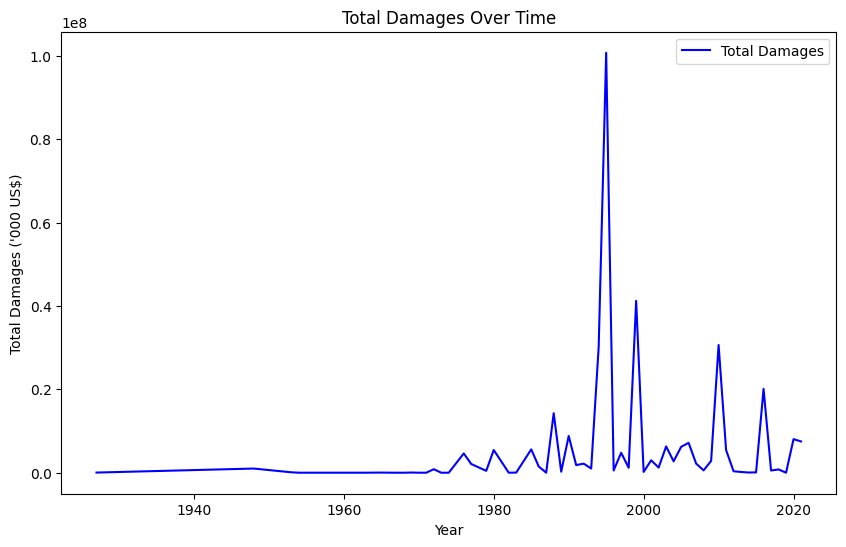

In [ ]:
# Convert 'Start Year' to datetime format and set it as the index
loss_data['Date'] = pd.to_datetime(loss_data['Start Year'], format='%Y')

# Aggregate the total damages per year
annual_damages = loss_data.groupby('Date')['Total Damages (\'000 US$)'].sum().reset_index()

# Plot the total damages over time to visualize the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(annual_damages['Date'], annual_damages['Total Damages (\'000 US$)'], label='Total Damages', color='b')
plt.xlabel('Year')
plt.ylabel('Total Damages (\'000 US$)')
plt.title('Total Damages Over Time')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset

loss_data = pd.read_csv('losses.csv')

# Display the first few rows to understand its structure
loss_data.head()


,Disaster Group,Disaster Subgroup,Disaster Type,ISO,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damages ('000 US$),Magnitude,Magnitude Scale
0,Natural,Geophysical,Earthquake,DZA,35.7,4.4,1965,1.0,1.0,1965,1.0,1.0,2.0,350.0,37000.0,12000.0,49350.0,2000.0,6.0,Richter
1,Natural,Geophysical,Earthquake,GRC,39.368,24.957,1968,2.0,20.0,1968,2.0,20.0,19.0,18.0,4000.0,3600.0,7618.0,600.0,7.0,Richter
2,Natural,Geophysical,Earthquake,ECU,-4.026,-80.542,1970,12.0,9.0,1970,12.0,9.0,29.0,120.0,60000.0,27992.0,88112.0,4000.0,7.0,Richter
3,Natural,Geophysical,Earthquake,CRI,10.679,-84.759,1973,4.0,14.0,1973,4.0,14.0,21.0,98.0,3563.0,84.0,3745.0,200.0,7.0,Richter
4,Natural,Geophysical,Earthquake,GTM,15.324,-89.101,1976,2.0,4.0,1976,2.0,4.0,23000.0,77000.0,3750000.0,1166000.0,4993000.0,1000000.0,8.0,Richter


### Data Preparation for Forecasting with Prophet

In this code segment, we prepare the data for time series forecasting using Prophet. First, we check the data types of each column to understand the structure and identify any necessary conversions. We then focus on the date column, `Start Year`, and convert it to a `datetime` format, renaming it to `ds` (which is the standard date column name used by Prophet).

Next, we ensure that the target column, `Total Damages ('000 US$)`, is numeric by converting it to a numeric type using `pd.to_numeric()`. This step also handles any non-numeric values by coercing them to `NaN` (which are later removed).

We then drop any rows where the target variable `y` has missing values to ensure that the dataset is clean and complete for modeling.

Finally, we print the first few rows of the cleaned dataset, focusing on the `ds` (date) and `y` (target) columns, to confirm that the data is ready for time series forecasting with Prophet.


In [ ]:
# Check the data types of each column
print(loss_data.dtypes)

# Convert the 'Start Year' to datetime (since Prophet uses 'ds' for the date)
loss_data['ds'] = pd.to_datetime(loss_data['Start Year'], format='%Y')

# Ensure that the target column 'Total Damages (\'000 US$)' is numeric
loss_data['y'] = pd.to_numeric(loss_data['Total Damages (\'000 US$)'], errors='coerce')

# Drop rows with any missing values in the target variable 'y'
loss_data = loss_data.dropna(subset=['y'])

# Verify the data after cleaning
print(loss_data[['ds', 'y']].head())


Disaster Group               object
Disaster Subgroup            object
Disaster Type                object
ISO                          object
Latitude                     object
Longitude                    object
Start Year                    int64
Start Month                 float64
Start Day                   float64
End Year                      int64
End Month                   float64
End Day                     float64
Total Deaths                float64
No. Injured                 float64
No. Affected                float64
No. Homeless                float64
Total Affected              float64
Total Damages ('000 US$)    float64
Magnitude                   float64
Magnitude Scale              object
dtype: object
          ds          y
0 1965-01-01     2000.0
1 1968-01-01      600.0
2 1970-01-01     4000.0
3 1973-01-01      200.0
4 1976-01-01  1000000.0


### One-Hot Encoding for 'Disaster Type' and 'Magnitude Scale'

In this code segment, we perform one-hot encoding on the `Disaster Type` and `ISO` columns to convert these categorical variables into numerical features. One-hot encoding is applied using `pd.get_dummies()`, which creates binary columns for each category in the specified columns. The `drop_first=True` parameter is used to avoid multicollinearity by dropping the first category of each column.

After encoding, the dataset now includes additional binary columns representing each disaster type and country code in the `ISO` column, allowing the model to utilize these features in the forecasting process.

We then print the first few rows of the encoded dataset to confirm that the transformation was successful and to review the new structure of the data.


In [ ]:
# Perform One-Hot Encoding for 'Disaster Type' and 'Magnitude Scale'
loss_data_encoded = pd.get_dummies(loss_data, columns=['Disaster Type', 'ISO'], drop_first=True)

# Check the encoded columns
print(loss_data_encoded.head())


  Disaster Group Disaster Subgroup Latitude Longitude  Start Year  \
0        Natural       Geophysical     35.7       4.4        1965   
1        Natural       Geophysical   39.368    24.957        1968   
2        Natural       Geophysical   -4.026   -80.542        1970   
3        Natural       Geophysical   10.679   -84.759        1973   
4        Natural       Geophysical   15.324   -89.101        1976   

   Start Month  Start Day  End Year  End Month  End Day  ...  ISO_SDN  \
0          1.0        1.0      1965        1.0      1.0  ...    False   
1          2.0       20.0      1968        2.0     20.0  ...    False   
2         12.0        9.0      1970       12.0      9.0  ...    False   
3          4.0       14.0      1973        4.0     14.0  ...    False   
4          2.0        4.0      1976        2.0      4.0  ...    False   

   ISO_SLV  ISO_SRB  ISO_SUN  ISO_TON  ISO_TUR  ISO_TWN ISO_VCT ISO_VNM  \
0    False    False    False    False    False    False   False   False

### Dropping Irrelevant Columns for Forecasting

In this step, we clean the dataset by dropping columns that are not relevant for the forecasting task. These columns include `Disaster Group`, `Disaster Subgroup`, `Latitude`, `Longitude`, and various date-related columns (`Start Year`, `Start Month`, `Start Day`, `End Year`, `End Month`, `End Day`, `Magnitude Scale`). Removing these columns ensures that we focus only on the necessary features for the forecasting model, making the dataset more suitable for analysis.

After dropping the irrelevant columns, we print the first few rows of the cleaned dataset to confirm that the data has been appropriately reduced and prepared for the forecasting process.


In [ ]:
# Drop irrelevant columns that won't be used for forecasting
loss_data_encoded_cleaned = loss_data_encoded.drop(columns=['Disaster Group', 'Disaster Subgroup', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Magnitude Scale'])

# Check the cleaned data
print(loss_data_encoded_cleaned.head())

   Total Deaths  No. Injured  No. Affected  No. Homeless  Total Affected  \
0           2.0        350.0       37000.0       12000.0         49350.0   
1          19.0         18.0        4000.0        3600.0          7618.0   
2          29.0        120.0       60000.0       27992.0         88112.0   
3          21.0         98.0        3563.0          84.0          3745.0   
4       23000.0      77000.0     3750000.0     1166000.0       4993000.0   

   Total Damages ('000 US$)  Magnitude         ds          y  \
0                    2000.0        6.0 1965-01-01     2000.0   
1                     600.0        7.0 1968-01-01      600.0   
2                    4000.0        7.0 1970-01-01     4000.0   
3                     200.0        7.0 1973-01-01      200.0   
4                 1000000.0        8.0 1976-01-01  1000000.0   

   Disaster Type_Flood  ...  ISO_SDN  ISO_SLV  ISO_SRB  ISO_SUN  ISO_TON  \
0                False  ...    False    False    False    False    False   
1     

In [ ]:
# Ensure the 'ds' column is in datetime format
loss_data_encoded_cleaned['ds'] = pd.to_datetime(loss_data_encoded_cleaned['ds'], format='%Y')

# Check the first few rows to confirm the conversion
print(loss_data_encoded_cleaned[['ds', 'y']].head())


          ds          y
0 1965-01-01     2000.0
1 1968-01-01      600.0
2 1970-01-01     4000.0
3 1973-01-01      200.0
4 1976-01-01  1000000.0


### Model Training and Evaluation with Random Forest Regressor

In this code segment, we prepare the data for training and testing a Random Forest Regressor model. First, we define the features (`X`) and the target variable (`y`). The features (`X`) include all columns except the `ds` (date) and the target variable (`Total Damages ('000 US$)`). The target variable `y` represents the total damages from natural disasters in thousands of U.S. dollars.

Next, we split the data into training and testing sets using `train_test_split()`, with 80% of the data used for training the model and 20% for testing. The `random_state=42` ensures the reproducibility of the split. We then print the shape of the training and testing data to confirm the split.

After preparing the data, we initialize a Random Forest Regressor model with 100 estimators and train the model using the training data (`X_train`, `y_train`). The trained model is then used to predict the total damages on the test set (`X_test`).

To evaluate the model's performance, we calculate two metrics:
- **R-squared (R²)**: Measures how well the model explains the variance in the target variable.
- **Mean Squared Error (MSE)**: Quantifies the average squared difference between the predicted and actual values.

The R-squared and MSE values are printed to assess the accuracy and performance of the Random Forest Regressor model.


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = loss_data_encoded_cleaned.drop(columns=['ds', 'Total Damages (\'000 US$)'])  # All columns except 'ds' and target variable 'y'
y = loss_data_encoded_cleaned['Total Damages (\'000 US$)']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (92, 52), Testing data: (23, 52)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest R-squared: {r2}")
print(f"Random Forest Mean Squared Error: {mse}")


Random Forest R-squared: 0.6124635890876065
Random Forest Mean Squared Error: 12038277695013.36


### Model Training and Evaluation with Linear Regression

In this code segment, we train and evaluate a Linear Regression model to predict the total damages from natural disasters. First, we initialize the Linear Regression model using `LinearRegression()` from the `sklearn.linear_model` library.

The model is then trained using the training data (`X_train`, `y_train`) with the `fit()` method. After training, the model predicts the target variable, total damages, on the test set (`X_test`) using the `predict()` method.

To evaluate the model’s performance, we calculate two key metrics:
- **R-squared (R²)**: Measures the proportion of variance in the target variable that is explained by the model. A higher R-squared indicates better model performance.
- **Mean Squared Error (MSE)**: Represents the average squared difference between the predicted and actual values. A lower MSE indicates better model accuracy.

The R-squared and MSE values are printed to assess the performance of the Linear Regression model and compare it to the Random Forest model's results.


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression R-squared: {r2_lr}")
print(f"Linear Regression Mean Squared Error: {mse_lr}")


Linear Regression R-squared: 1.0
Linear Regression Mean Squared Error: 3.916897154165431e-17


### Predicted vs Actual Values for Train and Test Data (Linear Regression)

In this code segment, we visualize the performance of the Linear Regression model by plotting the predicted vs actual values for both the training and testing datasets.

- The left plot compares the actual and predicted values for the training data. The blue bars represent the actual risk values, while the red bars represent the predicted values for the training set.
- The right plot shows the comparison for the test data, again with blue bars for the actual values and red bars for the predicted values.

Both plots help to visually assess how well the Linear Regression model performs on both the training and testing datasets. The closer the predicted values are to the actual values, the better the model's performance.



Linear Regression R-squared: 1.0
Linear Regression Mean Squared Error: 3.916897154165431e-17


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (92,) and arg 1 with shape (23,).

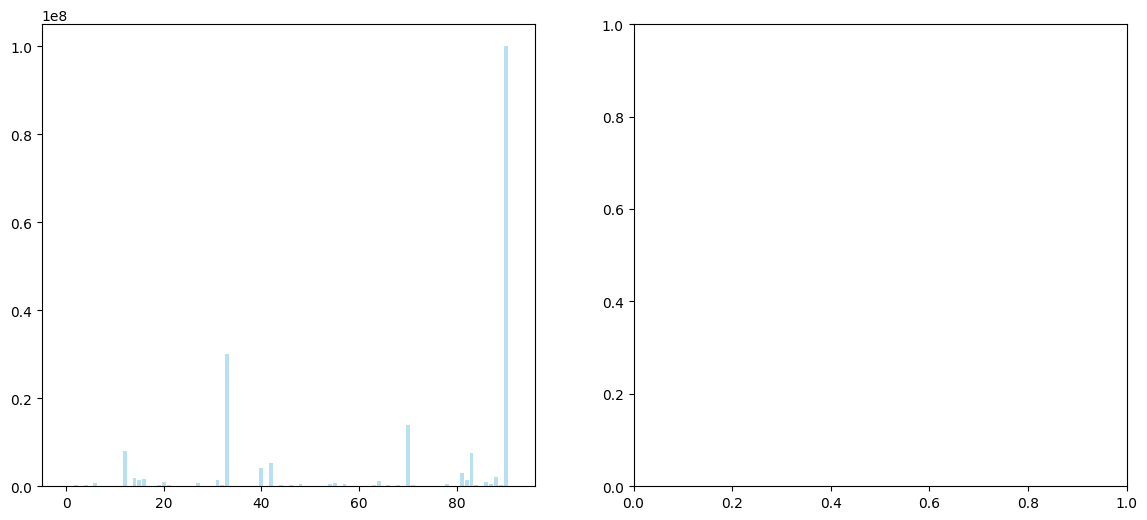

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Print R-squared and MSE
print(f"Linear Regression R-squared: {r2_lr}")
print(f"Linear Regression Mean Squared Error: {mse_lr}")

# Step 1: Visualize Predicted vs Actual for Train and Test Data
# Create figure and axis for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Train Data
ax1.bar(np.arange(len(y_train)), y_train, label='Actual Train', alpha=0.6, color='skyblue')
ax1.bar(np.arange(len(y_train)), y_pred_lr[:len(y_train)], label='Predicted Train', alpha=0.6, color='salmon')
ax1.set_title('Linear Regression Predicted vs Actual for Train Data')
ax1.set_xlabel('Index')
ax1.set_ylabel('Risk')
ax1.legend()

# Plot for Test Data
ax2.bar(np.arange(len(y_test)), y_test, label='Actual Test', alpha=0.6, color='skyblue')
ax2.bar(np.arange(len(y_test)), y_pred_lr[len(y_train):], label='Predicted Test', alpha=0.6, color='salmon')
ax2.set_title('Linear Regression Predicted vs Actual for Test Data')
ax2.set_xlabel('Index')
ax2.set_ylabel('Risk')
ax2.legend()

# Show plot
plt.tight_layout()
plt.show()


# 4 Earthquake Risk by Region
In this analysis, we aim to explore which regions have a greater likelihood of experiencing earthquakes.


### Data Cleaning, Feature Engineering, and Model Preparation for Earthquake Dataset

In this code segment, we perform data cleaning, feature engineering, and model preparation for the earthquake dataset. The process begins by loading the dataset `Earthquake.csv` and inspecting its structure by displaying the first few rows.

First, we handle missing data by dropping rows with missing values in critical columns such as `Magnitude`, `Latitude`, and `Longitude`. This ensures that we only work with complete data points that contain all necessary features for analysis.

Next, we create a binary target variable called `Risk` based on the earthquake's magnitude. If the magnitude is greater than 5, the earthquake is classified as "High Risk" (assigned a value of 1), otherwise, it is classified as "Low Risk" (assigned a value of 0). This allows us to perform a binary classification on the data.

The `ISO` column, which contains country codes, is then one-hot encoded to convert the categorical country data into numerical features. We use the `pd.get_dummies()` function to create dummy variables, with the `drop_first=True` parameter to avoid multicollinearity by dropping the first category.

After cleaning and encoding the data, we split the dataset into features (`X`) and the target variable (`y`). We then divide the data into training and testing sets using an 80/20 split, ensuring that we have separate data for model training and evaluation.

This cleaned and preprocessed data is now ready for model training and testing, helping us assess the risk of earthquakes based on various factors like magnitude and geographic location.


In [ ]:
earthquake_data = pd.read_csv('Earthquake.csv')

# Display the first few rows to understand its structure
earthquake_data.head()

,ISO,Latitude,Longitude,Start Year,Magnitude,Total Deaths,Total Affected,Magnitude (Mw)
0,IDN,-1.9708,138.9033,2025,5.0,NaN,NaN,5.0
1,TWN,23.1911,120.5429,2025,4.8,NaN,NaN,4.8
2,NaN,3.6920,127.8168,2025,4.6,NaN,NaN,4.6
3,ITA,38.9658,14.8889,2025,5.1,NaN,NaN,5.1
4,GRC,36.5805,25.6218,2025,4.6,NaN,NaN,4.6


In [ ]:
# Handle missing values (drop rows with missing target or other critical columns)
earthquake_data_cleaned = earthquake_data.dropna(subset=['Magnitude', 'Latitude', 'Longitude'])

# Create a binary target variable: 'High Risk' if magnitude is greater than 5
earthquake_data_cleaned['Risk'] = (earthquake_data_cleaned['Magnitude'] > 5).astype(int)

# One-hot encode the 'ISO' column (countries)
earthquake_data_encoded = pd.get_dummies(earthquake_data_cleaned, columns=['ISO'], drop_first=True)

# Check the cleaned data
print(earthquake_data_encoded.head())


In [ ]:
# Clean the data by dropping rows with missing values in critical columns
earthquake_data_cleaned = earthquake_data.dropna(subset=['Magnitude', 'Latitude', 'Longitude'])

# Create a binary target variable 'Risk' based on Magnitude
# High risk if magnitude is greater than 5
earthquake_data_cleaned['Risk'] = (earthquake_data_cleaned['Magnitude'] > 5).astype(int)

# One-Hot Encode the 'ISO' column (countries)
earthquake_data_encoded = pd.get_dummies(earthquake_data_cleaned, columns=['ISO'], drop_first=True)

# Check the processed data
print(earthquake_data_encoded.head())


### Splitting Data into Training and Testing Sets

In this code segment, we prepare the earthquake dataset for model training by splitting the data into features (`X`) and the target variable (`y`). The features (`X`) include all columns except the `Risk` column, which is the binary target variable indicating whether the earthquake is of high risk or low risk. The `Risk` column is used as the target variable (`y`) for the classification task.

We then split the dataset into training and testing sets using the `train_test_split()` function from the `sklearn.model_selection` library. We allocate 80% of the data for training the model and 20% for testing the model's performance. The `random_state=42` ensures the reproducibility of the split, allowing the same data division to be used each time the code is run.

Finally, we print the size of the training and testing datasets using `X_train.shape` and `X_test.shape` to confirm that the split has been done correctly, ensuring that we have enough data for both training and testing the model.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = earthquake_data_encoded.drop(columns=['Risk'])  # All columns except 'Risk'
y = earthquake_data_encoded['Risk']  # The target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the split data
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (1518, 122), Testing data: (380, 122)


### Training and Evaluating Random Forest Model

In this code segment, we train and evaluate a Random Forest classifier to predict the risk level of earthquakes (high or low). The Random Forest algorithm is an ensemble learning method that combines multiple decision trees to make more accurate predictions.

We start by initializing the Random Forest model using `RandomForestClassifier` from `sklearn.ensemble`. The model is configured with 100 estimators (trees) and a `random_state=42` to ensure reproducibility.

The model is then trained on the training data (`X_train`, `y_train`) using the `fit()` method. After training, we use the model to make predictions on the test data (`X_test`). In addition to the predicted labels (`y_pred_rf`), we also calculate the predicted probabilities for the positive class (`y_prob_rf`), which will be used for performance evaluation.

To evaluate the model's performance, we calculate two metrics:
1. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: This metric measures the model's ability to distinguish between classes. A higher ROC-AUC score indicates better performance.
2. **Precision-Recall Curve**: We also compute the precision-recall curve, which helps evaluate the model's performance, especially when dealing with imbalanced datasets. It shows the trade-off between precision (positive predictive value) and recall (sensitivity).

Finally, we print the ROC-AUC score to assess the overall performance of the Random Forest model.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve # Import roc_auc_score and precision_recall_curve

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate using ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

print(f"Random Forest ROC-AUC: {roc_auc_rf}")

Random Forest ROC-AUC: 1.0


### Simulating and Predicting for High-Risk Earthquake Regions

In this code segment, we simulate data for high-risk earthquake regions, such as Japan and Indonesia, and use the trained Random Forest model to predict the risk of earthquakes in these regions. The data for these regions is manually created and includes the following columns:

- **Latitude and Longitude**: Coordinates for Japan and Indonesia.
- **Start Year**: The year 2025, indicating when the simulated earthquakes will occur.
- **Magnitude**: Magnitudes greater than 5 (6.5 for Japan and 7.0 for Indonesia), indicating high-risk earthquakes.
- **Total Deaths and Total Affected**: Placeholder values representing the number of casualties and affected individuals.
- **Risk**: A binary value of `1`, indicating high-risk earthquakes based on magnitude.
- **ISO**: Country codes for Japan (`JPN`) and Indonesia (`IDN`).

After creating the simulated data, we apply one-hot encoding to the `ISO` column to convert the categorical country data into numerical features using `pd.get_dummies()`. This ensures that the dataset can be processed by the Random Forest model.

Next, we ensure that the columns in the `high_risk_df_encoded` match those in the previously encoded earthquake dataset (`earthquake_data_encoded`). Missing columns are added with zero values to ensure consistency in the data format.

We then reorder the columns to match the original dataset and print the simulated high-risk data to verify the transformations.

Finally, we use the trained Random Forest model (`rf_model`) to make predictions on the high-risk regions by removing the target variable (`Risk`). We also calculate the predicted probabilities for each region's earthquake risk. The predictions and probabilities are printed to assess the risk of earthquakes in the simulated high-risk regions.

This segment demonstrates how the trained model can be used to predict future earthquake risks based on geographical data and earthquake magnitude.


In [ ]:
# Simulate data for high-risk regions (e.g., Japan, Indonesia)
high_risk_data = {
    'Latitude': [35.6762, -6.1751],  # Coordinates for Japan and Indonesia
    'Longitude': [139.6503, 106.8650],
    'Start Year': [2025, 2025],
    'Magnitude': [6.5, 7.0],  # Magnitude greater than 5, indicating high risk
    'Total Deaths': [1000, 1500],  # Placeholder values
    'Total Affected': [50000, 100000],  # Placeholder values
    'Magnitude (Mw)': [6.5, 7.0],  # Magnitude on the Mw scale
    'Risk': [1, 1],  # High risk (Risk = 1)
    'ISO': ['JPN', 'IDN']  # Manually add ISO codes for Japan and Indonesia
}

# Create a DataFrame for high-risk regions
high_risk_df = pd.DataFrame(high_risk_data)

# One-Hot Encode the 'ISO' column (countries)
high_risk_df_encoded = pd.get_dummies(high_risk_df, columns=['ISO'], drop_first=True)

# Ensure the columns match the encoded earthquake data (add missing columns for the regions)
for col in earthquake_data_encoded.columns:
    if col not in high_risk_df_encoded.columns:
        high_risk_df_encoded[col] = 0  # Add missing columns as zeros

# Reorder the columns to match the original dataset
high_risk_df_encoded = high_risk_df_encoded[earthquake_data_encoded.columns]

# Check the high-risk region data
print(high_risk_df_encoded)

# Make predictions on the high-risk regions
high_risk_predictions = rf_model.predict(high_risk_df_encoded.drop(columns=['Risk']))
high_risk_probabilities = rf_model.predict_proba(high_risk_df_encoded.drop(columns=['Risk']))[:, 1]

# Print predictions
print(f"Predictions for High-Risk Regions: {high_risk_predictions}")
print(f"Predicted Probabilities: {high_risk_probabilities}")


### Linear Regression for Predicting Risk in High-Risk Regions

In this code segment, we apply Linear Regression to predict the `Risk` of earthquakes in high-risk regions such as Japan and Indonesia. Since the `Risk` variable is binary (0 or 1), Linear Regression can still be used as a way to model the relationship between features (such as magnitude, latitude, longitude, and other geographical factors) and the risk level.

We start by preparing the data, where `X_high_risk` contains the features (all columns except `Risk`), and `y_high_risk` contains the target variable (`Risk`).

Next, we initialize and train a Linear Regression model using `LinearRegression()` from `sklearn.linear_model`. The model is trained on the high-risk regions data (`X_high_risk`, `y_high_risk`).

After training the model, we make predictions using the `predict()` method and round the predicted values to the nearest integer (since the target variable is binary). This gives us either a `0` or `1` prediction, representing low or high risk, respectively.

To visualize the model’s performance, we create a bar chart that compares the actual `Risk` values with the predicted `Risk` values for the high-risk regions. The chart uses blue bars for actual risk and red bars for predicted risk.

Finally, we print the actual and predicted risk values for each region to compare how well the model predicts the earthquake risk in Japan and Indonesia.


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for Linear Regression
# Since 'Risk' is binary (0 or 1), we will predict it using Linear Regression
X_high_risk = high_risk_df_encoded.drop(columns=['Risk'])  # Features
y_high_risk = high_risk_df_encoded['Risk']  # Target (Risk)

# Initialize and train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_high_risk, y_high_risk)

# Predict using the trained model
y_pred_linreg = lin_reg_model.predict(X_high_risk)

# Round predictions to the nearest integer (since it's binary, it should be 0 or 1)
y_pred_linreg_rounded = np.round(y_pred_linreg)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.bar(['Japan', 'Indonesia'], y_high_risk, label='Actual Risk', alpha=0.6, color='blue')
plt.bar(['Japan', 'Indonesia'], y_pred_linreg_rounded, label='Predicted Risk', alpha=0.6, color='red')
plt.ylabel('Risk')
plt.title('Actual vs Predicted Risk for High-Risk Regions (Linear Regression)')
plt.legend()
plt.show()

# Print the predicted vs actual values
print("Actual Risk vs Predicted Risk:")
for region, actual, predicted in zip(['Japan', 'Indonesia'], y_high_risk, y_pred_linreg_rounded):
    print(f"{region}: Actual = {actual}, Predicted = {predicted}")


### Actual vs Predicted Values (Linear Regression)

This chart compares the actual and predicted values of earthquake risk using Linear Regression. The blue points represent the actual and predicted risk values, while the red dashed line (`y = x`) indicates the line of perfect prediction. The closer the points are to the red dashed line, the better the model’s predictions align with the actual values. This visualization helps assess the accuracy of the model's predictions.


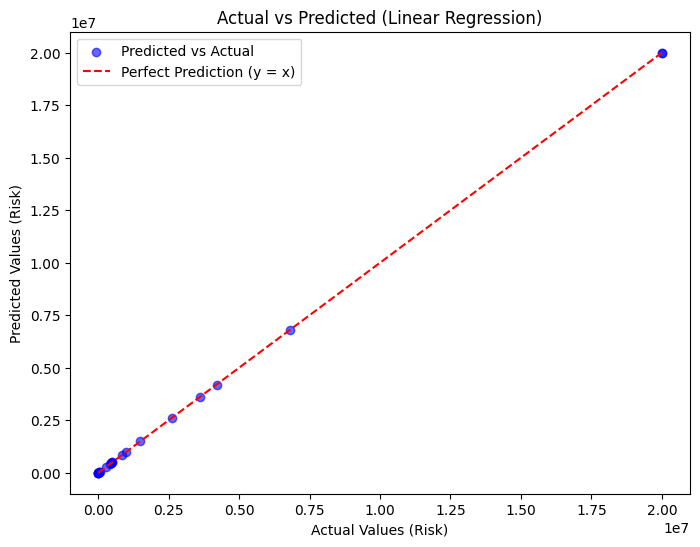

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted as X-Y scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect prediction (y = x line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction (y = x)')

# Labels and title
plt.xlabel('Actual Values (Risk)')
plt.ylabel('Predicted Values (Risk)')
plt.title('Actual vs Predicted (Linear Regression)')
plt.legend()

# Show the plot
plt.show()
